# Data Science 2 (modeling)

## Computer-exam BFVM19DATASC2 - Numerical Analysis

### 2020-2021 - 1st opportunity, Fri. 19 Mar 2021, 16:00-17:30, ZP11/H1.86

**Instructions:**

Provide your answers in the code cells corresponding with each of the questions. For those questions that require a textual answer rather than python code, you may either type your answer in the cell using a python comment, or insert a new markdown cell with your text. All questions have the possible number of points to be scored indicated. Your grade will be calculated as follows:

$$
\text{Grade} = 1 + 9 \cdot \frac {\text{Points Scored}} {\text{Maximum Score}}
$$

You can receive partial credit on textual answers as well as code if you don't get the whole right answer. Explain your code through commenting, even if it doesn't work correctly. On your computer desktop you will find all data files and supplementary materials. All notes, textbooks and other written reference materials are permitted.

<div class="alert alert-warning">
<b>After finishing:</b>
<ol><li>
Rename your notebook with your name and student number, like `JohnDoe_123456`, using the menu option `File` > `Rename`.
</li><li>
Evaluate the notebook by means of the menu option `Kernel` > `Restart & Run All` and check that your notebook runs without errors.
</li><li>
Save the evaluated notebook using the menu option `File` > `Save and Checkpoint`.
</li><li>
Open a terminal, change to the desktop folder using `cd ~/Desktop`, and type `submit_your_work --help` to get help on submit script usage.
</li><li>
Submit your file using a syntax like `submit_your_work 123456 JohnDoe_123456.ipynb`.
</li></ol>
</div>

***

**Chronobiology** is a field of biology that examines timing processes, including periodic (cyclic) phenomena in living organisms, such as their adaptation to daily (circadian) rhythms. In mammals, the hormones cortisol and melatonin play important roles in regulating circadian cycles, for example in relation to body temperature.

![The-normal-synchronous-relationships-between-sleep-and-daytime-activity-and-cortisol.jpeg](attachment:The-normal-synchronous-relationships-between-sleep-and-daytime-activity-and-cortisol.jpeg)
<small>*Image source: [Hickie et al. 2013](https://dx.doi.org/10.1186/1741-7015-11-79)*</small>

Normally, the body is constantly correcting its circadian cycle on the basis of daylight, among other things. However, in the absence of such external clues, it still maintains a similar rhythm. The period of the spontaneous fluctuations may deviate from 24 hours, however. In the following questions, you will determine the period of the human circadian clock in the absence of input from the environment on the basis of a simplified model.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

### Question 1

The interactions between cortisol and melatonin can be modeled by a pair of coupled ordinary differential equations. *Ralston's method* (see also p.254 of Ch.7 in Kiusalaas' textbook) is an integration method from the Runge-Kutta family that is fully characterized by the coefficients in the third row of the following table:

| Method | Order | **${c}$** | **${q}$** |
| :-- | :-: | :-: | :-: |
| Euler's | 1 | $1$ | $\times$ |
| Heun's | 2 | $\frac{1}{2}$, $\frac{1}{2}$ | $1$ |
| Ralston's | 2 | $\frac{1}{3}$, $\frac{2}{3}$ | $\frac{3}{4}$ |
| Runge-Kutta's | 4 | $\frac{1}{6}$, $\frac{1}{3}$, $\frac{1}{3}$, $\frac{1}{6}$ | $\begin{array}{ccc} \frac{1}{2} & & \\ 0 & \frac{1}{2} & \\ 0 & 0 & 1 \end{array}$ |

#### Question 1a <small>[5 pts]</small>

Ralston's method is listed as a second-order method. Explain in your own words what it means for a method to be of order 2.

-------

Error of the computed solution is approximately proportional to $h^2$ So, if you need one hundred times more accuracy, you need to take ten times as many steps to achieve it. This is in contrast with Euler's method with error $h$. To achive one hundred times more accuracy, you need to take one hundred times as many steps to achieve it.

https://www.researchgate.net/post/What-are-the-shortcomings-of-euler-method-and-what-are-its-improvements-in-the-heuns-method

-------

In [2]:
def ralston(f, y0, t, h):
    """y = ralston(f, y0, t, h).
    Ralston's method for solving the initial
    value problem {y}' = {f(t,{y})} from t=0,
    where {y} = {y[0],y[1],...,y[n-1]}.
    f      = user-supplied function that returns the
             array f(t,y) = {y’[0],y’[1],...,y’[n-1]}.
    y0     = initial value for y
    t      = terminal value of t
    h      = approximate step size (may be adjusted to
             exactly subdivide the interval (0,t))
    """
    y = y0
    steps = int(t / h)
    xs = np.linspace(0, t, steps+1)
    
    for x in xs[:-1]:
        k0 = h*f(x, y)
        k1 = h*f(x + 3/4*h, y + 3/4*k0)
        y = y + (k0/3 + 2/3*k1) 
    
    return y

#### Question 1c <small>[5 pts]</small>

Define a function `circadian(t, y)` that describes the circadian differential equation model, where $\boldsymbol{y}(t) = \left[ C(t), M(t) \right]^T$ contains the measurable blood plasma concentrations of cortisol $C(t)$ and melatonin $M(t)$ as a function of time $t$:

$$
\left\{
\begin{aligned}
\frac{\text{d}C}{\text{d}t} &= +\tfrac{1}{7} \cdot C \cdot \ln \left( M \right)
\\
\frac{\text{d}M}{\text{d}t} &= -\tfrac{1}{2} \cdot M \cdot \ln \left( C \right)
\end{aligned}
\right.
$$

Time is measured in *hours*; the plasma concentrations are expressed in *arbitrary units* relative to equilibrium (i.e. a static state $M(t)=C(t)=1$ is a solution of these equations).

In [3]:
def circadian(t, y):
    C, M = y
    
    dC = 1/7 * C * np.log(M)
    dM = -1/2 * M * np.log(C)
    
    return np.array([dC, dM])

Your functions can now be combined to determine the cortisol- and melatonin levels according to the model at any time point $t$. We start from initial values $C(0) = 1.5$ a.u. and $M(0) = 0.5$ a.u. and use a step size of a quarter hour, as follows.

<div class="alert alert-danger">
If you did not succeed in solving the previous question, then use the alternative model definition below to continue.
</div>

In [4]:
def model(t):
    return ralston(circadian, np.array([1.5, 0.5]), t, h=0.25)

# Only uncomment the following line if you did not succeed in solving question 1!
# model = lambda t: np.array([np.exp(-0.5*np.sin(t/4)), np.exp(-np.cos(t/4))])

### Question 2

We plot the spontaneous fluctuations in cortisol and melatonin according to the model across three days (i.e. 72 hours). The period of the oscillations is close to but not exactly equal to 24 hours.

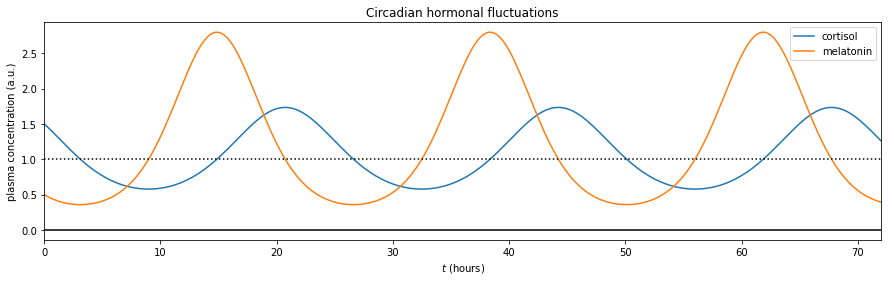

In [5]:
ts = np.linspace(0, 72, 289)
ys = [model(t) for t in ts]
plt.figure(figsize=(15, 4))
plt.plot(ts, ys, '-')
plt.axhline(0.0, color='k'); plt.axhline(1.0, color='k', ls=':')
plt.xlabel('$t$ (hours)'); plt.ylabel('plasma concentration (a.u.)'); plt.title('Circadian hormonal fluctuations')
plt.xlim(0, 72); plt.legend(['cortisol', 'melatonin'])
plt.show()

#### Question 2a <small>[10 pts]</small>

One way of determining the period $T$ of the fluctuations is by determining the time difference between consecutive minima or maxima.

Roughly bracket two consecutive minima/maxima, and then use *golden section search* to improve the accuracy of the estimates. What is the period of the fluctuations, expressed in hours, with an accuracy of 3 decimals? (You may use the cortisol- or melatonin-curve, as you prefer.)

In [10]:
def minima_melat_model(t):
    """
    t: time
    index: the index to keep: 0 for cortisol, 1 for melatonin
    """
    res = model(t)
    return res[1]

In [11]:
def minimumsearch(f, a, b, steps):
    """lo, hi = minimumsearch(f, a, b, steps).
    Searches the interval (a,b) in a number of steps for
    the bounds (lo,hi) of the minima of f(x).
    """
    if steps < 2:
        steps = 2
    h = (b - a) / steps
    lo = a
    mid = a + h
    f_lo = f(lo)
    f_mid = f(mid)
    
    for step in range(2, steps+1):
        hi = a + h * step
        f_hi = f(hi)
        if f_mid <= f_lo and f_mid <= f_hi:
            yield lo, hi
        
        lo, f_lo = mid, f_mid
        mid, f_mid = hi, f_hi
        
from math import sqrt

def golden_search(f, a, b, tol=1e-8):
    """minimum = golden_search(f, a, b, tol=...).
    Finds a minimum of the function f using golden
    section search, starting from bracketing values
    a and b and ending when |b-a| < tol.
    """
    c = (3.0 - sqrt(5.0)) / 2.0
    x1 = a + c * (b - a)
    x2 = b - c * (b - a)
    f1 = f(x1)
    f2 = f(x2)
    
    while abs(b-a) > tol:
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + c * (b - a)
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = b - c * (b - a)
            f2 = f(x2)
    return (a + b) / 2.0

In [13]:
xmins = []
ymins = []
for lo, hi in minimumsearch(minima_melat_model, 15, 60, 100):
    xmin = golden_search(minima_melat_model, lo, hi)
    ymin = minima_melat_model(xmin)
    
    xmins.append(xmin)
    ymins.append(ymin)

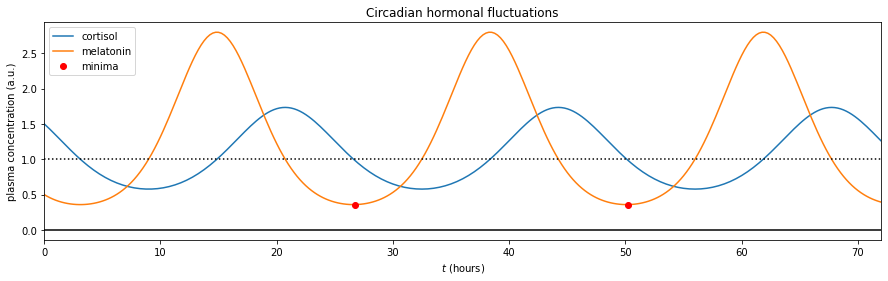

In [14]:
ts = np.linspace(0, 72, 289)
ys = [model(t) for t in ts]
plt.figure(figsize=(15, 4))
plt.plot(ts, ys, '-')
plt.plot(xmins, ymins, 'or', label='minima')
plt.axhline(0.0, color='k'); plt.axhline(1.0, color='k', ls=':')
plt.xlabel('$t$ (hours)'); plt.ylabel('plasma concentration (a.u.)'); plt.title('Circadian hormonal fluctuations')
plt.xlim(0, 72); plt.legend(['cortisol', 'melatonin', 'minima'])
plt.show()

In [15]:
print('The period of fluctuation for melatonin around {:.3f} hours.'.format(xmins[-1]-xmins[0]))

The period of fluctuation for melatonin around 23.500 hours.


#### Question 2b <small>[10 pts]</small>

Another way of determining the period $T$ of the fluctuations is by determining the difference between two times where the curve traverses the dotted line $y=1$ in the same direction (i.e. upwards or downwards).

Roughly bracket two consecutive such traversals, and then use the *secant method* to improve the accuracy of the estimates. What is the period of the fluctuations, expressed in hours, with an accuracy of 3 decimals? (You may use the cortisol- or melatonin-curve, as you prefer.)

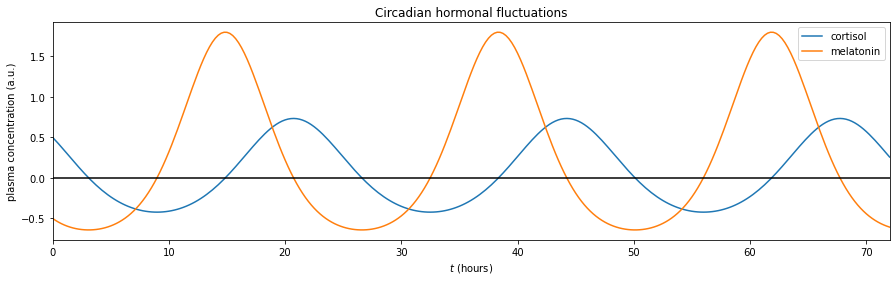

In [18]:
ts = np.linspace(0, 72, 289)
ys = [model(t) for t in ts]
plt.figure(figsize=(15, 4))
plt.plot(ts, np.array(ys)-1, '-')
plt.axhline(0.0, color='k');
plt.xlabel('$t$ (hours)'); plt.ylabel('plasma concentration (a.u.)'); plt.title('Circadian hormonal fluctuations')
plt.xlim(0, 72); plt.legend(['cortisol', 'melatonin'])
plt.show()

In [24]:
def adjusted_melat_model(t):
    """
    t: time
    index: the index to keep: 0 for cortisol, 1 for melatonin
    """
    res = model(t)
    return (res - 1)[1]

In [48]:
def rootsearch(f, a, b, steps):
    """lo, hi = rootsearch(f, a, b, steps).
    Searches the interval (a,b) in a number of steps for
    the bounds (lo,hi) of the roots of f(x).
    """
    h = (b - a) / steps # window width
    f_lo = f(a)# first value - 1
    for step in range(steps):
        lo = a + step * h 
        hi = lo + h
        f_hi = f(hi)
        if f_lo * f_hi <= 0.0:
            yield lo, hi
        f_lo = f_hi
        
def secant(f, a, b, tol=1e-8):
    """root = secant(f, a, b, tol=...).
    Finds a root of f(x) = 0 by the secant method.
    """
    x1 = a
    x2 = b
    
    f1 = f(x1)
    f2 = f(x2)
    
    if f1 == 0:
        return x1
    
    if f2 == 0:
        return x2
    
    print('Initial:')
    print('x1:',x1)
    print('x2:',x2)
    print('f1',f1)
    print('f2',f2)

    while abs(x2 - x1) > tol:
        print('====================')
        print('Iteration')
        x3 = (f1*x2 - f2*x1) / (f1 - f2)
        f3 = f(x3)
        print('x3:', x3)
        print('f3:', f3)
        
        if f3 == 0:
            return x3
        
        x1, x2 = x2, x3
        f1, f2 = f2, f3
        
        print('New set:')
        print('x1:',x1)
        print('x2:',x2)
        print('f1',f1)
        print('f2',f2)
        
    # x3 will be assigned to x2
    return x2

In [49]:
for lo, hi in rootsearch(adjusted_melat_model, 30, 60, steps=100):
    root = secant(adjusted_melat_model, lo, hi, tol=1e-2)

Initial:
x1: 32.4
x2: 32.699999999999996
f1 -0.06142242397431341
f2 0.0052339419159634915
Iteration
x3: 32.676443621643365
f3: 0.0052339419159634915
New set:
x1: 32.699999999999996
x2: 32.676443621643365
f1 0.0052339419159634915
f2 0.0052339419159634915
Iteration


/tmp/ipykernel_3521837/3824676490.py:41: RuntimeWarning: divide by zero encountered in double_scalars
  x3 = (f1*x2 - f2*x1) / (f1 - f2)


OverflowError: cannot convert float infinity to integer